2024-10-18 03:03:12.791784: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-18 03:03:13.100081: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-18 03:03:13.880771: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Found 108 images belonging to 7 classes.
Found 105 images belonging to 7 classes.


/home/rajesh/anaconda3/lib/python3.11/site-packages/keras/src/preprocessing/image.py:202: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn(


Train and Validation sets have been created.


2024-10-18 03:03:15.555927: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-18 03:03:15.731835: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-18 03:03:15.731978: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

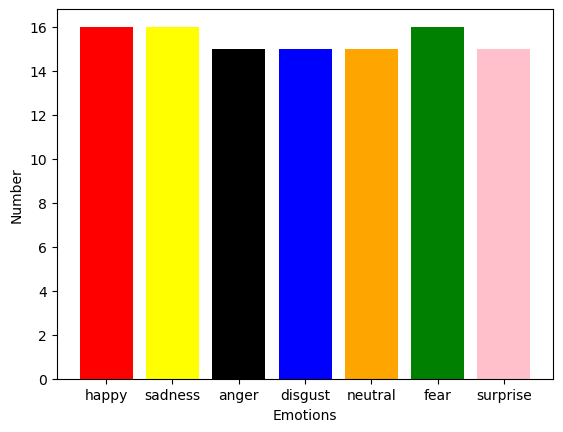

In [1]:
import tensorflow
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
# Importing Deep Learning Libraries
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from keras import regularizers
from keras.preprocessing import image

#HISTOGRAM CODE
#histogram code
import matplotlib.pyplot as plt
import os

emotions = ["happy", "sadness", "anger", "disgust", "neutral", "fear", "surprise"]

folder_path = "Jaffetrainvalidation/train"
# Counting the number of images per emotion
counts = [len(os.listdir(os.path.join(folder_path, emotion))) for emotion in emotions]

# Plotting the bar chart
colors = ['red', 'yellow', 'black', 'blue', 'orange', 'green', 'pink']
plt.bar(emotions, height=counts, color=colors)
plt.ylabel('Number')
plt.xlabel('Emotions')


#plt.savefig('hostgoarm.png')
#plt.show()


# Data generators
batch_size = 64

# Data augmentation for training set
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Normalization for validation set (no augmentation)
datagen_val = ImageDataGenerator(rescale=1./255)



train_ds = datagen_train.flow_from_directory("Jaffetrainvalidation/train",
                                             target_size=(256, 256),
                                             color_mode="rgb",
                                             batch_size=batch_size,
                                             class_mode='categorical',
                                             shuffle=True)

test_ds = datagen_val.flow_from_directory("Jaffetrainvalidation/validation",
                                         target_size=(256, 256),
                                         color_mode="rgb",
                                         batch_size=batch_size,
                                         class_mode='categorical',
                                         shuffle=False)
print('Train and Validation sets have been created.')


#model vgg19

from keras.applications.vgg19 import VGG19
conv_base = VGG19(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
conv_base.summary()

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))

model.add(Dense(7, activation='softmax'))

# model.summary()
# Visualize the model.
#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

conv_base.trainable = False

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

print('CNN model has been created you can proceed to train you data with this model.')






In [2]:
# Training the model
epochs = 500

history = model.fit(x=train_ds,
                    epochs=epochs,
                    validation_data=test_ds)

# Print training history
print(history.history)


Epoch 1/500


2024-10-18 03:03:26.403618: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8905
2024-10-18 03:03:26.907887: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.37GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-18 03:03:26.937095: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.02GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-18 03:03:27.123997: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.02GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if m

1/2 [==============>...............] - ETA: 11s - loss: 2.6092 - accuracy: 0.1719

2024-10-18 03:03:36.594339: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.08GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


2/2 [==============================] - 25s 13s/step - loss: 2.8459 - accuracy: 0.1852 - val_loss: 2.5275 - val_accuracy: 0.1810
Epoch 2/500
2/2 [==============================] - 3s 2s/step - loss: 2.3368 - accuracy: 0.2685 - val_loss: 2.6574 - val_accuracy: 0.3048
Epoch 3/500
2/2 [==============================] - 2s 2s/step - loss: 2.0826 - accuracy: 0.2963 - val_loss: 4.0044 - val_accuracy: 0.2667
Epoch 4/500
2/2 [==============================] - 3s 1s/step - loss: 2.1061 - accuracy: 0.3241 - val_loss: 5.2482 - val_accuracy: 0.1429
Epoch 5/500
2/2 [==============================] - 2s 2s/step - loss: 1.9667 - accuracy: 0.3148 - val_loss: 5.9219 - val_accuracy: 0.1429
Epoch 6/500
2/2 [==============================] - 3s 2s/step - loss: 2.0163 - accuracy: 0.3333 - val_loss: 6.4074 - val_accuracy: 0.1429
Epoch 7/500
2/2 [==============================] - 3s 2s/step - loss: 1.7940 - accuracy: 0.4167 - val_loss: 6.7133 - val_accuracy: 0.1429
Epoch 8/500
2/2 [===========================

Epoch 60/500
2/2 [==============================] - 3s 2s/step - loss: 0.3740 - accuracy: 0.8889 - val_loss: 7.6175 - val_accuracy: 0.2095
Epoch 61/500
2/2 [==============================] - 3s 2s/step - loss: 0.4202 - accuracy: 0.8241 - val_loss: 7.1418 - val_accuracy: 0.2286
Epoch 62/500
2/2 [==============================] - 3s 2s/step - loss: 0.3077 - accuracy: 0.8611 - val_loss: 6.5161 - val_accuracy: 0.2476
Epoch 63/500
2/2 [==============================] - 3s 2s/step - loss: 0.2817 - accuracy: 0.9074 - val_loss: 5.2029 - val_accuracy: 0.3048
Epoch 64/500
2/2 [==============================] - 3s 2s/step - loss: 0.3964 - accuracy: 0.8519 - val_loss: 4.7490 - val_accuracy: 0.3143
Epoch 65/500
2/2 [==============================] - 3s 2s/step - loss: 0.4181 - accuracy: 0.8333 - val_loss: 4.6984 - val_accuracy: 0.3048
Epoch 66/500
2/2 [==============================] - 3s 2s/step - loss: 0.2862 - accuracy: 0.8889 - val_loss: 4.8409 - val_accuracy: 0.2952
Epoch 67/500
2/2 [=========

Epoch 119/500
2/2 [==============================] - 3s 2s/step - loss: 0.1928 - accuracy: 0.9352 - val_loss: 1.5348 - val_accuracy: 0.6000
Epoch 120/500
2/2 [==============================] - 3s 2s/step - loss: 0.2894 - accuracy: 0.9167 - val_loss: 1.5693 - val_accuracy: 0.6000
Epoch 121/500
2/2 [==============================] - 3s 2s/step - loss: 0.2345 - accuracy: 0.9074 - val_loss: 1.6416 - val_accuracy: 0.6095
Epoch 122/500
2/2 [==============================] - 3s 2s/step - loss: 0.1738 - accuracy: 0.9444 - val_loss: 1.6931 - val_accuracy: 0.6190
Epoch 123/500
2/2 [==============================] - 3s 2s/step - loss: 0.2591 - accuracy: 0.9259 - val_loss: 1.6997 - val_accuracy: 0.6286
Epoch 124/500
2/2 [==============================] - 3s 2s/step - loss: 0.2336 - accuracy: 0.9352 - val_loss: 1.6828 - val_accuracy: 0.6381
Epoch 125/500
2/2 [==============================] - 3s 2s/step - loss: 0.1958 - accuracy: 0.9259 - val_loss: 1.6386 - val_accuracy: 0.6571
Epoch 126/500
2/2 [=

2/2 [==============================] - 3s 2s/step - loss: 0.1244 - accuracy: 0.9630 - val_loss: 1.0872 - val_accuracy: 0.7429
Epoch 178/500
2/2 [==============================] - 3s 2s/step - loss: 0.1393 - accuracy: 0.9352 - val_loss: 1.1256 - val_accuracy: 0.7333
Epoch 179/500
2/2 [==============================] - 3s 2s/step - loss: 0.1264 - accuracy: 0.9537 - val_loss: 1.1519 - val_accuracy: 0.7238
Epoch 180/500
2/2 [==============================] - 3s 2s/step - loss: 0.1103 - accuracy: 0.9722 - val_loss: 1.1694 - val_accuracy: 0.7238
Epoch 181/500
2/2 [==============================] - 3s 2s/step - loss: 0.0916 - accuracy: 0.9630 - val_loss: 1.1993 - val_accuracy: 0.7143
Epoch 182/500
2/2 [==============================] - 3s 2s/step - loss: 0.1526 - accuracy: 0.9167 - val_loss: 1.2461 - val_accuracy: 0.7238
Epoch 183/500
2/2 [==============================] - 3s 2s/step - loss: 0.1297 - accuracy: 0.9352 - val_loss: 1.3202 - val_accuracy: 0.7143
Epoch 184/500
2/2 [===============

2/2 [==============================] - 3s 2s/step - loss: 0.1041 - accuracy: 0.9630 - val_loss: 1.1625 - val_accuracy: 0.7714
Epoch 236/500
2/2 [==============================] - 3s 2s/step - loss: 0.0563 - accuracy: 0.9907 - val_loss: 1.1672 - val_accuracy: 0.7714
Epoch 237/500
2/2 [==============================] - 3s 2s/step - loss: 0.0933 - accuracy: 0.9815 - val_loss: 1.1715 - val_accuracy: 0.7905
Epoch 238/500
2/2 [==============================] - 3s 2s/step - loss: 0.1425 - accuracy: 0.9815 - val_loss: 1.1596 - val_accuracy: 0.7810
Epoch 239/500
2/2 [==============================] - 3s 2s/step - loss: 0.0659 - accuracy: 0.9630 - val_loss: 1.1601 - val_accuracy: 0.7619
Epoch 240/500
2/2 [==============================] - 3s 2s/step - loss: 0.0746 - accuracy: 0.9722 - val_loss: 1.1440 - val_accuracy: 0.7714
Epoch 241/500
2/2 [==============================] - 3s 2s/step - loss: 0.0689 - accuracy: 0.9815 - val_loss: 1.1441 - val_accuracy: 0.7524
Epoch 242/500
2/2 [===============

2/2 [==============================] - 2s 818ms/step - loss: 0.0558 - accuracy: 0.9815 - val_loss: 1.0064 - val_accuracy: 0.7905
Epoch 294/500
2/2 [==============================] - 2s 1s/step - loss: 0.1148 - accuracy: 0.9630 - val_loss: 1.0164 - val_accuracy: 0.7905
Epoch 295/500
2/2 [==============================] - 2s 898ms/step - loss: 0.1023 - accuracy: 0.9630 - val_loss: 1.0321 - val_accuracy: 0.8095
Epoch 296/500
2/2 [==============================] - 2s 826ms/step - loss: 0.1505 - accuracy: 0.9352 - val_loss: 1.0495 - val_accuracy: 0.8095
Epoch 297/500
2/2 [==============================] - 2s 832ms/step - loss: 0.0578 - accuracy: 0.9907 - val_loss: 1.0566 - val_accuracy: 0.8000
Epoch 298/500
2/2 [==============================] - 2s 1s/step - loss: 0.1503 - accuracy: 0.9537 - val_loss: 1.0449 - val_accuracy: 0.8000
Epoch 299/500
2/2 [==============================] - 2s 816ms/step - loss: 0.1107 - accuracy: 0.9815 - val_loss: 1.0481 - val_accuracy: 0.7905
Epoch 300/500
2/2 [

Epoch 351/500
2/2 [==============================] - 2s 820ms/step - loss: 0.0585 - accuracy: 0.9815 - val_loss: 0.9752 - val_accuracy: 0.8095
Epoch 352/500
2/2 [==============================] - 2s 1s/step - loss: 0.0794 - accuracy: 0.9722 - val_loss: 0.9202 - val_accuracy: 0.8190
Epoch 353/500
2/2 [==============================] - 2s 821ms/step - loss: 0.0394 - accuracy: 0.9907 - val_loss: 0.8716 - val_accuracy: 0.8190
Epoch 354/500
2/2 [==============================] - 2s 1s/step - loss: 0.0602 - accuracy: 0.9907 - val_loss: 0.8376 - val_accuracy: 0.8381
Epoch 355/500
2/2 [==============================] - 2s 819ms/step - loss: 0.0366 - accuracy: 0.9907 - val_loss: 0.8153 - val_accuracy: 0.8286
Epoch 356/500
2/2 [==============================] - 2s 1s/step - loss: 0.0330 - accuracy: 0.9907 - val_loss: 0.8114 - val_accuracy: 0.8286
Epoch 357/500
2/2 [==============================] - 2s 1s/step - loss: 0.0726 - accuracy: 0.9630 - val_loss: 0.8192 - val_accuracy: 0.8381
Epoch 358/5

Epoch 409/500
2/2 [==============================] - 2s 1s/step - loss: 0.0376 - accuracy: 0.9815 - val_loss: 1.0741 - val_accuracy: 0.8000
Epoch 410/500
2/2 [==============================] - 2s 1s/step - loss: 0.0666 - accuracy: 0.9630 - val_loss: 1.1314 - val_accuracy: 0.8095
Epoch 411/500
2/2 [==============================] - 2s 933ms/step - loss: 0.0485 - accuracy: 0.9815 - val_loss: 1.1343 - val_accuracy: 0.7810
Epoch 412/500
2/2 [==============================] - 2s 929ms/step - loss: 0.0732 - accuracy: 0.9815 - val_loss: 1.1282 - val_accuracy: 0.7905
Epoch 413/500
2/2 [==============================] - 2s 941ms/step - loss: 0.0708 - accuracy: 0.9815 - val_loss: 1.1023 - val_accuracy: 0.8000
Epoch 414/500
2/2 [==============================] - 2s 1s/step - loss: 0.0424 - accuracy: 0.9907 - val_loss: 1.0693 - val_accuracy: 0.8095
Epoch 415/500
2/2 [==============================] - 2s 940ms/step - loss: 0.0686 - accuracy: 0.9815 - val_loss: 1.0770 - val_accuracy: 0.8095
Epoch 41

Epoch 467/500
2/2 [==============================] - 2s 956ms/step - loss: 0.0367 - accuracy: 0.9815 - val_loss: 1.4448 - val_accuracy: 0.7714
Epoch 468/500
2/2 [==============================] - 2s 955ms/step - loss: 0.0480 - accuracy: 0.9907 - val_loss: 1.3983 - val_accuracy: 0.7619
Epoch 469/500
2/2 [==============================] - 2s 1s/step - loss: 0.0307 - accuracy: 0.9907 - val_loss: 1.3597 - val_accuracy: 0.7619
Epoch 470/500
2/2 [==============================] - 2s 1s/step - loss: 0.1322 - accuracy: 0.9722 - val_loss: 1.2926 - val_accuracy: 0.7810
Epoch 471/500
2/2 [==============================] - 2s 1s/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 1.2262 - val_accuracy: 0.7905
Epoch 472/500
2/2 [==============================] - 2s 1s/step - loss: 0.0300 - accuracy: 0.9907 - val_loss: 1.2007 - val_accuracy: 0.7905
Epoch 473/500
2/2 [==============================] - 2s 1s/step - loss: 0.1617 - accuracy: 0.9259 - val_loss: 1.1554 - val_accuracy: 0.8095
Epoch 474/500


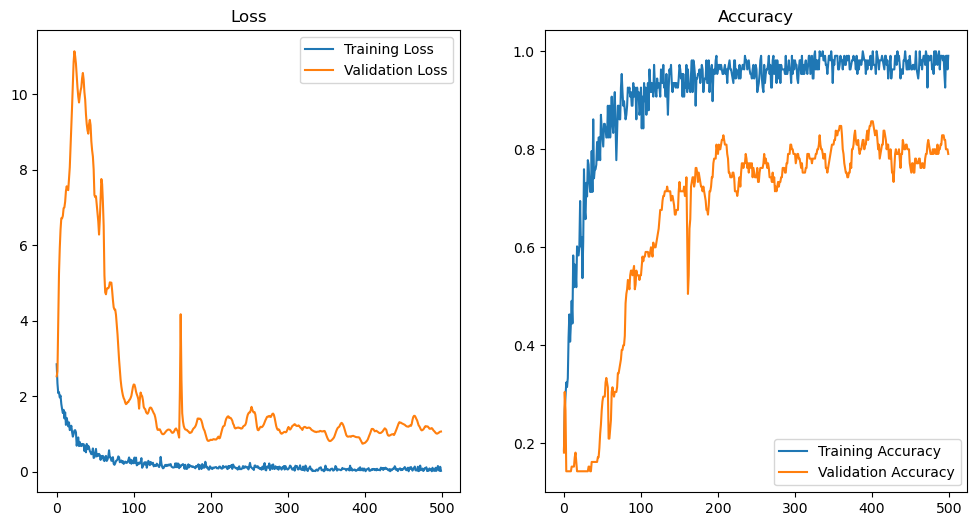

In [3]:

# Plotting training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [4]:
#JAFFERESENT5050 RATIO

In [5]:
import tensorflow
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
# Importing Deep Learning Libraries
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from keras import regularizers
from keras.preprocessing import image

#HISTOGRAM CODE
#histogram code
import matplotlib.pyplot as plt
import os

emotions = ["happy", "sadness", "anger", "disgust", "neutral", "fear", "surprise"]

folder_path = "Jaffetrainvalidation/train"
# Counting the number of images per emotion
counts = [len(os.listdir(os.path.join(folder_path, emotion))) for emotion in emotions]

# Plotting the bar chart
#colors = ['red', 'yellow', 'black', 'blue', 'orange', 'green', 'pink']
#plt.bar(emotions, height=counts, color=colors)
#plt.ylabel('Number')
#plt.xlabel('Emotions')


#plt.savefig('hostgoarm.png')
#plt.show()


# Data generators
batch_size = 64

# Data augmentation for training set
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Normalization for validation set (no augmentation)
datagen_val = ImageDataGenerator(rescale=1./255)



train_ds = datagen_train.flow_from_directory("Jaffetrainvalidation/train",
                                             target_size=(256, 256),
                                             color_mode="rgb",
                                             batch_size=batch_size,
                                             class_mode='categorical',
                                             shuffle=True)

test_ds = datagen_val.flow_from_directory("Jaffetrainvalidation/validation",
                                         target_size=(256, 256),
                                         color_mode="rgb",
                                         batch_size=batch_size,
                                         class_mode='categorical',
                                         shuffle=False)
print('Train and Validation sets have been created.')


from keras.applications.resnet import ResNet152
conv_base = ResNet152(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3)
)


#conv_base.summary()


model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))

model.add(Dense(7, activation='softmax'))

# model.summary()
# Visualize the model.
#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

conv_base.trainable = False

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

print('CNN model has been created you can proceed to train you data with this model.')






Found 108 images belonging to 7 classes.
Found 105 images belonging to 7 classes.
Train and Validation sets have been created.
CNN model has been created you can proceed to train you data with this model.


In [6]:
# Training the model
epochs = 500

history = model.fit(x=train_ds,
                    epochs=epochs,
                    validation_data=test_ds)

# Print training history
print(history.history)



Epoch 1/500
2/2 [==============================] - 13s 5s/step - loss: 3.0667 - accuracy: 0.1481 - val_loss: 6.7289 - val_accuracy: 0.1429
Epoch 2/500
2/2 [==============================] - 2s 1s/step - loss: 2.7036 - accuracy: 0.2315 - val_loss: 11.5798 - val_accuracy: 0.1429
Epoch 3/500
2/2 [==============================] - 2s 965ms/step - loss: 2.7059 - accuracy: 0.2315 - val_loss: 25.3996 - val_accuracy: 0.1429
Epoch 4/500
2/2 [==============================] - 2s 962ms/step - loss: 2.6170 - accuracy: 0.1759 - val_loss: 29.8561 - val_accuracy: 0.1429
Epoch 5/500
2/2 [==============================] - 2s 962ms/step - loss: 2.3348 - accuracy: 0.1852 - val_loss: 28.5721 - val_accuracy: 0.1429
Epoch 6/500
2/2 [==============================] - 2s 1s/step - loss: 2.5755 - accuracy: 0.1944 - val_loss: 22.6869 - val_accuracy: 0.1429
Epoch 7/500
2/2 [==============================] - 2s 1s/step - loss: 2.5075 - accuracy: 0.1667 - val_loss: 18.6574 - val_accuracy: 0.1524
Epoch 8/500
2/2 [=

2/2 [==============================] - 2s 971ms/step - loss: 1.6287 - accuracy: 0.4444 - val_loss: 12.6805 - val_accuracy: 0.1429
Epoch 60/500
2/2 [==============================] - 2s 970ms/step - loss: 1.5123 - accuracy: 0.4167 - val_loss: 12.7706 - val_accuracy: 0.1429
Epoch 61/500
2/2 [==============================] - 2s 1s/step - loss: 1.4131 - accuracy: 0.4630 - val_loss: 11.8622 - val_accuracy: 0.1238
Epoch 62/500
2/2 [==============================] - 2s 976ms/step - loss: 1.3131 - accuracy: 0.5648 - val_loss: 10.5191 - val_accuracy: 0.1333
Epoch 63/500
2/2 [==============================] - 2s 1s/step - loss: 1.3292 - accuracy: 0.4722 - val_loss: 9.1353 - val_accuracy: 0.1333
Epoch 64/500
2/2 [==============================] - 2s 1s/step - loss: 1.3432 - accuracy: 0.5463 - val_loss: 8.5240 - val_accuracy: 0.1333
Epoch 65/500
2/2 [==============================] - 2s 1s/step - loss: 1.3657 - accuracy: 0.5000 - val_loss: 8.9251 - val_accuracy: 0.1333
Epoch 66/500
2/2 [=========

2/2 [==============================] - 2s 1s/step - loss: 0.9181 - accuracy: 0.6389 - val_loss: 3.9563 - val_accuracy: 0.2667
Epoch 118/500
2/2 [==============================] - 2s 1s/step - loss: 1.1081 - accuracy: 0.5648 - val_loss: 4.1211 - val_accuracy: 0.2667
Epoch 119/500
2/2 [==============================] - 2s 1s/step - loss: 1.0633 - accuracy: 0.6204 - val_loss: 4.4072 - val_accuracy: 0.2571
Epoch 120/500
2/2 [==============================] - 2s 991ms/step - loss: 0.9910 - accuracy: 0.5648 - val_loss: 4.1767 - val_accuracy: 0.2857
Epoch 121/500
2/2 [==============================] - 2s 1s/step - loss: 0.8278 - accuracy: 0.6852 - val_loss: 4.1733 - val_accuracy: 0.2667
Epoch 122/500
2/2 [==============================] - 2s 1s/step - loss: 0.8481 - accuracy: 0.6759 - val_loss: 4.5467 - val_accuracy: 0.2762
Epoch 123/500
2/2 [==============================] - 2s 1s/step - loss: 1.0712 - accuracy: 0.6389 - val_loss: 5.0881 - val_accuracy: 0.2571
Epoch 124/500
2/2 [============

2/2 [==============================] - 2s 1s/step - loss: 0.7958 - accuracy: 0.7500 - val_loss: 4.9479 - val_accuracy: 0.2667
Epoch 176/500
2/2 [==============================] - 2s 981ms/step - loss: 0.7852 - accuracy: 0.7037 - val_loss: 4.5671 - val_accuracy: 0.3238
Epoch 177/500
2/2 [==============================] - 2s 988ms/step - loss: 0.7346 - accuracy: 0.7407 - val_loss: 4.4096 - val_accuracy: 0.3333
Epoch 178/500
2/2 [==============================] - 2s 1s/step - loss: 0.7346 - accuracy: 0.7130 - val_loss: 4.2419 - val_accuracy: 0.3810
Epoch 179/500
2/2 [==============================] - 2s 1s/step - loss: 0.8343 - accuracy: 0.6944 - val_loss: 3.8988 - val_accuracy: 0.3810
Epoch 180/500
2/2 [==============================] - 2s 1s/step - loss: 0.8145 - accuracy: 0.6759 - val_loss: 4.3094 - val_accuracy: 0.3524
Epoch 181/500
2/2 [==============================] - 2s 1s/step - loss: 0.8300 - accuracy: 0.7222 - val_loss: 5.0757 - val_accuracy: 0.3333
Epoch 182/500
2/2 [=========

2/2 [==============================] - 2s 1s/step - loss: 0.7298 - accuracy: 0.6759 - val_loss: 4.1999 - val_accuracy: 0.3619
Epoch 234/500
2/2 [==============================] - 2s 972ms/step - loss: 0.6759 - accuracy: 0.7778 - val_loss: 4.2809 - val_accuracy: 0.3714
Epoch 235/500
2/2 [==============================] - 2s 971ms/step - loss: 0.8362 - accuracy: 0.7130 - val_loss: 4.1323 - val_accuracy: 0.3714
Epoch 236/500
2/2 [==============================] - 2s 973ms/step - loss: 0.5996 - accuracy: 0.7500 - val_loss: 4.3095 - val_accuracy: 0.3429
Epoch 237/500
2/2 [==============================] - 2s 1s/step - loss: 0.5490 - accuracy: 0.7870 - val_loss: 4.4356 - val_accuracy: 0.3429
Epoch 238/500
2/2 [==============================] - 2s 972ms/step - loss: 0.6850 - accuracy: 0.7315 - val_loss: 4.4268 - val_accuracy: 0.3143
Epoch 239/500
2/2 [==============================] - 2s 973ms/step - loss: 0.5570 - accuracy: 0.8148 - val_loss: 4.2753 - val_accuracy: 0.3429
Epoch 240/500
2/2 [

2/2 [==============================] - 2s 1s/step - loss: 0.5392 - accuracy: 0.8241 - val_loss: 1.8189 - val_accuracy: 0.5333
Epoch 292/500
2/2 [==============================] - 2s 1s/step - loss: 0.5126 - accuracy: 0.8056 - val_loss: 1.7655 - val_accuracy: 0.5333
Epoch 293/500
2/2 [==============================] - 2s 975ms/step - loss: 0.4472 - accuracy: 0.8333 - val_loss: 1.9224 - val_accuracy: 0.5238
Epoch 294/500
2/2 [==============================] - 2s 972ms/step - loss: 0.4887 - accuracy: 0.8056 - val_loss: 2.1061 - val_accuracy: 0.4952
Epoch 295/500
2/2 [==============================] - 2s 1s/step - loss: 0.6124 - accuracy: 0.8333 - val_loss: 2.3276 - val_accuracy: 0.4857
Epoch 296/500
2/2 [==============================] - 2s 972ms/step - loss: 0.5561 - accuracy: 0.8426 - val_loss: 2.5877 - val_accuracy: 0.4762
Epoch 297/500
2/2 [==============================] - 2s 974ms/step - loss: 0.6610 - accuracy: 0.7778 - val_loss: 2.7455 - val_accuracy: 0.4667
Epoch 298/500
2/2 [===

2/2 [==============================] - 2s 970ms/step - loss: 0.5967 - accuracy: 0.7500 - val_loss: 4.0481 - val_accuracy: 0.2762
Epoch 350/500
2/2 [==============================] - 2s 1s/step - loss: 0.5194 - accuracy: 0.7778 - val_loss: 4.0143 - val_accuracy: 0.2762
Epoch 351/500
2/2 [==============================] - 2s 971ms/step - loss: 0.6687 - accuracy: 0.7407 - val_loss: 3.8109 - val_accuracy: 0.2952
Epoch 352/500
2/2 [==============================] - 2s 1s/step - loss: 0.5149 - accuracy: 0.7963 - val_loss: 3.9623 - val_accuracy: 0.3429
Epoch 353/500
2/2 [==============================] - 2s 1s/step - loss: 0.6327 - accuracy: 0.7500 - val_loss: 4.1719 - val_accuracy: 0.3429
Epoch 354/500
2/2 [==============================] - 2s 1s/step - loss: 0.3937 - accuracy: 0.8796 - val_loss: 4.5498 - val_accuracy: 0.2857
Epoch 355/500
2/2 [==============================] - 2s 1s/step - loss: 0.5701 - accuracy: 0.8333 - val_loss: 4.8427 - val_accuracy: 0.3048
Epoch 356/500
2/2 [=========

Epoch 407/500
2/2 [==============================] - 2s 972ms/step - loss: 0.4640 - accuracy: 0.8241 - val_loss: 5.0029 - val_accuracy: 0.4190
Epoch 408/500
2/2 [==============================] - 2s 973ms/step - loss: 0.5159 - accuracy: 0.8056 - val_loss: 4.8215 - val_accuracy: 0.3810
Epoch 409/500
2/2 [==============================] - 2s 1s/step - loss: 0.5993 - accuracy: 0.8056 - val_loss: 4.2575 - val_accuracy: 0.4000
Epoch 410/500
2/2 [==============================] - 2s 1s/step - loss: 0.4110 - accuracy: 0.8333 - val_loss: 3.8956 - val_accuracy: 0.3905
Epoch 411/500
2/2 [==============================] - 2s 1s/step - loss: 0.4947 - accuracy: 0.8241 - val_loss: 3.3734 - val_accuracy: 0.3810
Epoch 412/500
2/2 [==============================] - 2s 1s/step - loss: 0.5428 - accuracy: 0.7963 - val_loss: 3.1354 - val_accuracy: 0.4000
Epoch 413/500
2/2 [==============================] - 2s 970ms/step - loss: 0.4103 - accuracy: 0.8519 - val_loss: 2.8596 - val_accuracy: 0.4476
Epoch 414/5

Epoch 465/500
2/2 [==============================] - 2s 993ms/step - loss: 0.5057 - accuracy: 0.8333 - val_loss: 1.7367 - val_accuracy: 0.6095
Epoch 466/500
2/2 [==============================] - 2s 1s/step - loss: 0.3955 - accuracy: 0.8611 - val_loss: 1.6172 - val_accuracy: 0.6381
Epoch 467/500
2/2 [==============================] - 2s 1s/step - loss: 0.5889 - accuracy: 0.7500 - val_loss: 1.6797 - val_accuracy: 0.6286
Epoch 468/500
2/2 [==============================] - 2s 1s/step - loss: 0.4404 - accuracy: 0.8519 - val_loss: 1.8558 - val_accuracy: 0.6095
Epoch 469/500
2/2 [==============================] - 2s 973ms/step - loss: 0.4576 - accuracy: 0.8056 - val_loss: 2.1434 - val_accuracy: 0.5810
Epoch 470/500
2/2 [==============================] - 2s 973ms/step - loss: 0.5291 - accuracy: 0.8426 - val_loss: 2.1938 - val_accuracy: 0.5905
Epoch 471/500
2/2 [==============================] - 2s 1s/step - loss: 0.6372 - accuracy: 0.7593 - val_loss: 1.7508 - val_accuracy: 0.6286
Epoch 472/5

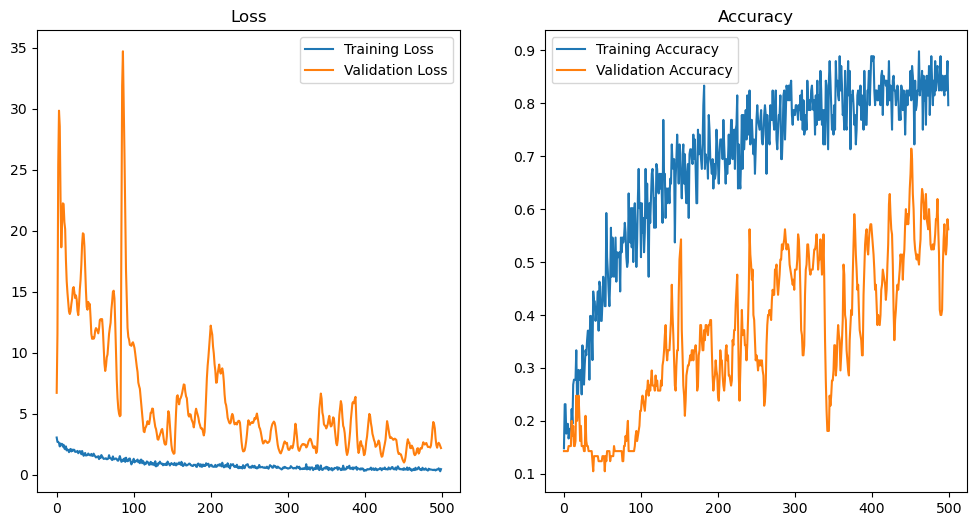

In [7]:
# Plotting training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()